In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.pyplot as plt

In [166]:
sns.set_palette('colorblind')

In [2]:
headlines = pd.read_csv('abcnews-date-text.csv')

In [3]:
headlines.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
# Split dates into year/month/day components
headlines['year'] = headlines.publish_date.astype(str).str[:4]
headlines['month'] = headlines.publish_date.astype(str).str[4:6]
headlines['day'] = headlines.publish_date.astype(str).str[6:]

In [5]:
headlines.head()

,publish_date,headline_text,year,month,day
0,20030219,aba decides against community broadcasting lic...,2003,02,19
1,20030219,act fire witnesses must be aware of defamation,2003,02,19
2,20030219,a g calls for infrastructure protection summit,2003,02,19
3,20030219,air nz staff in aust strike for pay rise,2003,02,19
4,20030219,air nz strike to affect australian travellers,2003,02,19


In [6]:
# Reformat publish_date column as a datetime object
headlines.publish_date = pd.to_datetime(headlines['year']+headlines['month']+headlines['day'])

In [7]:
headlines['month_of_year'] = pd.to_datetime(headlines['year']+'/'+headlines['month'])

In [8]:
headlines['year'] = headlines['year'].str[2:]

In [9]:
headlines.head()

,publish_date,headline_text,year,month,day,month_of_year
0,2003-02-19,aba decides against community broadcasting lic...,03,02,19,2003-02-01
1,2003-02-19,act fire witnesses must be aware of defamation,03,02,19,2003-02-01
2,2003-02-19,a g calls for infrastructure protection summit,03,02,19,2003-02-01
3,2003-02-19,air nz staff in aust strike for pay rise,03,02,19,2003-02-01
4,2003-02-19,air nz strike to affect australian travellers,03,02,19,2003-02-01


In [10]:
def boolean_search(word, whole_word=True):
    '''Returns whether each headline contains the searched word.
    If whole_word = False, searches for any word containing the searched word.'''
    if(whole_word):
        return headlines['headline_text'].str.contains(fr"\b{word}\b")
    else: 
        return headlines['headline_text'].str.contains(word)


In [11]:
def word_search(word, whole_word=True):
    '''Returns the dataframe of headlines containing the searched word.
    If whole_word = False, searches for any word containing the searched word.'''
    return headlines[boolean_search(word, whole_word)]

In [12]:
# Search for headlines concerning the United States or its abbreviations
us_headlines = pd.concat([word_search('united states'),word_search('usa'),word_search('us')])

In [13]:
# Add in headlines containing any variant of America/American/America's, but excludes references to names of continents.
us_headlines = pd.concat([us_headlines, headlines[boolean_search('america', False) 
                                                  & ~boolean_search('north america', False) 
                                                  & ~boolean_search('south america', False)]])

In [14]:
us_headlines = us_headlines.drop_duplicates().sort_index()

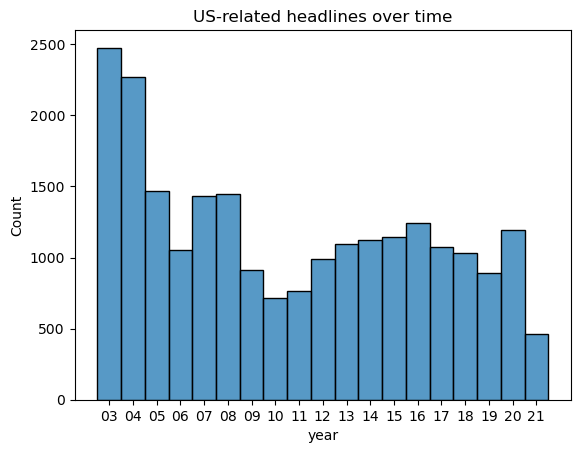

In [15]:
sns.histplot(x=us_headlines['year'])
plt.title("US-related headlines over time")
plt.show()

In [16]:
us_headlines.head()

,publish_date,headline_text,year,month,day,month_of_year
15,2003-02-19,blizzard buries united states in bills,03,02,19,2003-02-01
185,2003-02-19,us british aircraft attack sth iraq target,03,02,19,2003-02-01
204,2003-02-20,americas cup fourth race cancelled,03,02,20,2003-02-01
291,2003-02-20,hussein says iraq doesnt want war with us,03,02,20,2003-02-01
302,2003-02-20,iraqi use of human shields a war crime us,03,02,20,2003-02-01


In [17]:
us_headlines.tail()

,publish_date,headline_text,year,month,day,month_of_year
1243972,2021-12-23,united states approves the first covid 19 pill,21,12,23,2021-12-01
1244032,2021-12-27,covid cases continues to soar in us,21,12,27,2021-12-01
1244088,2021-12-28,us daily covid case numbers again soar to record,21,12,28,2021-12-01
1244116,2021-12-29,travel chaos continue in the us as numbers of,21,12,29,2021-12-01
1244177,2021-12-31,the year that was under us president joe biden,21,12,31,2021-12-01


In [18]:
us_cloud = WordCloud().generate(' '.join(us_headlines['headline_text']))

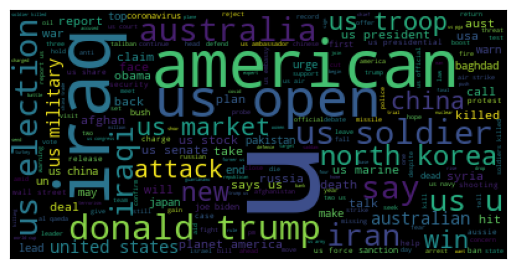

In [19]:
plt.tick_params(labelbottom=False,labelleft=False,length=0)
plt.imshow(us_cloud);

In [20]:
covid_headlines = pd.concat([word_search('covid',False),word_search('coronavirus')]).drop_duplicates().sort_index()

In [21]:
covid_headlines.head()

,publish_date,headline_text,year,month,day,month_of_year
1187063,2020-01-15,who says new china coronavirus could spread; w...,20,01,15,2020-01-01
1187255,2020-01-17,thailand finds second case of new chinese coro...,20,01,17,2020-01-01
1187393,2020-01-20,coronavirus chinese pneumonia mystery explainer,20,01,20,2020-01-01
1187477,2020-01-21,china confirms human to human transmission of ...,20,01,21,2020-01-01
1187479,2020-01-21,coronavirus brisbane person released from isol...,20,01,21,2020-01-01


In [22]:
covid_cloud = WordCloud().generate(' '.join(covid_headlines['headline_text']))

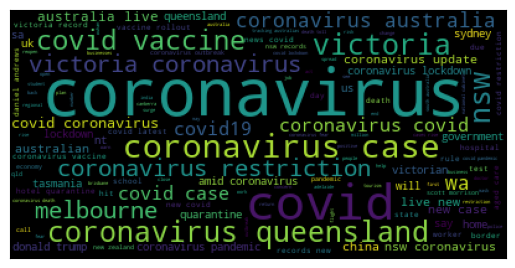

In [23]:
plt.tick_params(labelbottom=False,labelleft=False,length=0)
plt.imshow(covid_cloud);

In [235]:
pandemic_headlines = word_search('pandemic', False)

In [236]:
pandemic_headlines_precovid = pandemic_headlines.loc[pandemic_headlines['year'].astype(int) < 20]

<AxesSubplot: xlabel='year', ylabel='Count'>

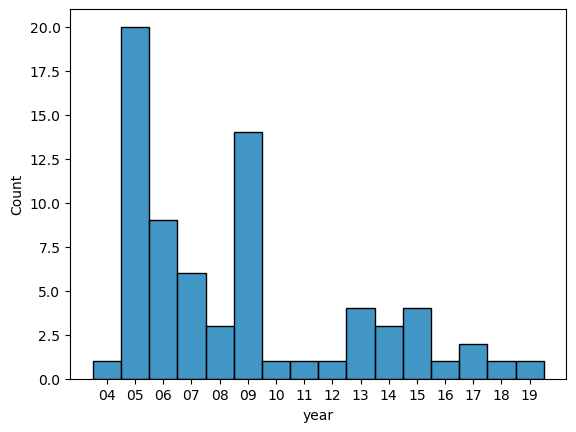

In [237]:
sns.histplot(pandemic_headlines_precovid['year'])

<AxesSubplot: xlabel='year', ylabel='Count'>

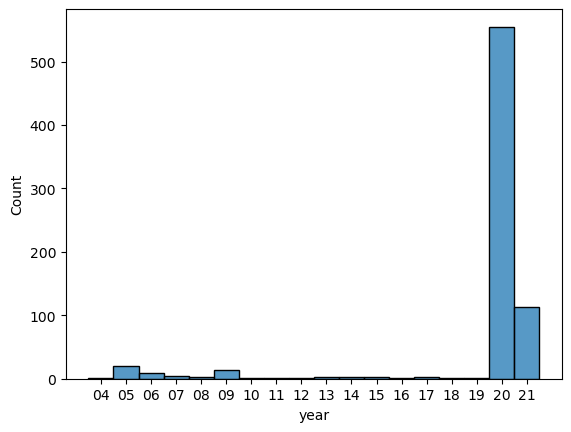

In [28]:
sns.histplot(pandemic_headlines['year'])

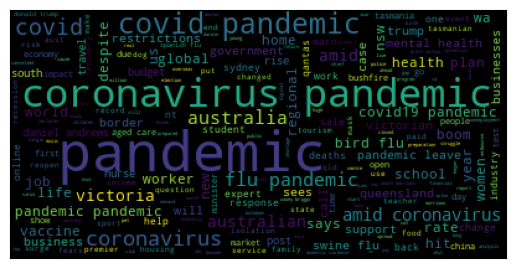

In [29]:
pandemic_cloud = WordCloud().generate(' '.join(pandemic_headlines['headline_text']))
plt.tick_params(labelbottom=False,labelleft=False,length=0)
plt.imshow(pandemic_cloud);

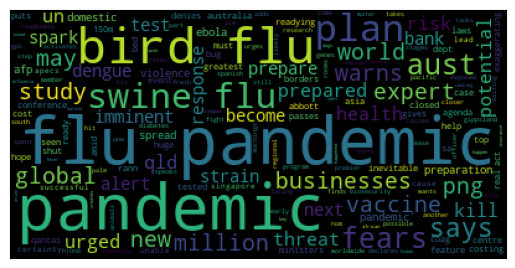

In [30]:
precovid_pandemic_cloud = WordCloud().generate(' '.join(pandemic_headlines_precovid['headline_text']))
plt.tick_params(labelbottom=False,labelleft=False,length=0)
plt.imshow(precovid_pandemic_cloud);

<AxesSubplot: xlabel='month_of_year', ylabel='Count'>

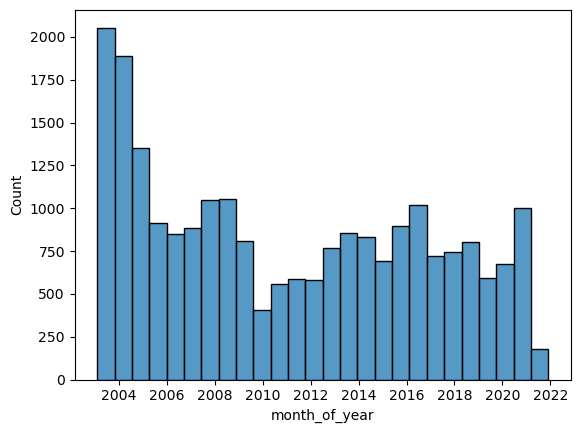

In [35]:
sns.histplot(x=us_headlines['month_of_year'])

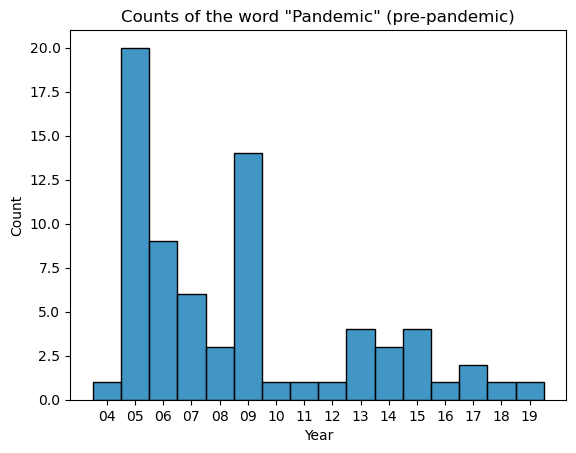

In [238]:
sns.histplot(x=pandemic_headlines_precovid['year'])
plt.xlabel('Year')
plt.title('Counts of the word "Pandemic" (pre-pandemic)')
plt.show()

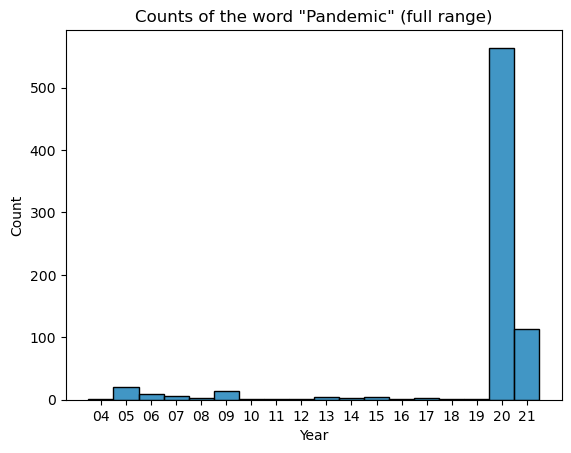

In [239]:
sns.histplot(x=pandemic_headlines['year'])
plt.xlabel('Year')
plt.title('Counts of the word "Pandemic" (full range)')
plt.show()

<AxesSubplot: xlabel='month_of_year'>

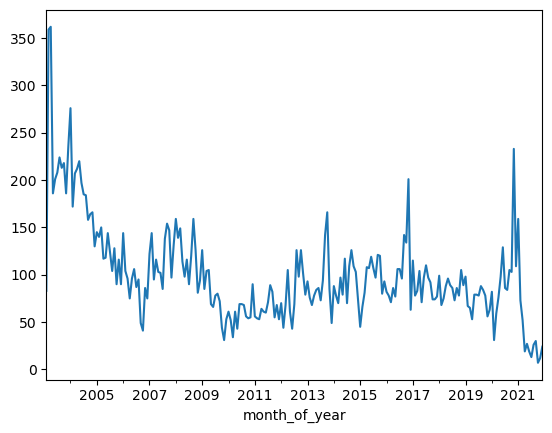

In [62]:
us_headlines.groupby(['month_of_year']).headline_text.count()

In [72]:
china_headlines = pd.concat([word_search('china',False),word_search('chinese')]).drop_duplicates().sort_index()

In [69]:
japan_headlines = word_search('japan',False)

In [77]:
russia_headlines = word_search('russia',False)

In [99]:
(len(us_headlines),len(china_headlines),len(japan_headlines),len(russia_headlines),len(england_headlines),len(iraq_headlines))

(22774, 12800, 4944, 4078, 11034, 8260)

In [98]:
england_headlines = pd.concat([word_search('england',False),word_search('english'),word_search('uk'), word_search('united kingdom',False),word_search('britain',False),word_search('british')]).drop_duplicates().sort_index()

In [92]:
iraq_headlines = word_search('iraq',False)

In [104]:
india_headlines = word_search('india',False)

In [106]:
indonesia_headlines = word_search('indonesia',False)

In [108]:
pakistan_headlines = word_search('pakistan',False)

In [121]:
france_headlines = pd.concat([word_search('france',False),word_search('french')])

In [215]:
australia_headlines = word_search('australia',False)

In [217]:
headline_df_dict = {'USA':us_headlines,'China':china_headlines,'Japan':japan_headlines,
                    'Russia':russia_headlines,'England':england_headlines,'Iraq':iraq_headlines, 'Australia': australia_headlines,
                   'India': india_headlines,'Indonesia':indonesia_headlines,'Pakistan': pakistan_headlines,'France':france_headlines}

In [218]:
num_mentions = {(key, len(value)) for (key, value) in headline_df_dict.items()}

In [219]:
pd.DataFrame(num_mentions,columns=['Country','Total mentions']).sort_values('Total mentions',ascending=False).set_index('Country')

,Total mentions
Country,
Australia,36424
USA,22774
China,12800
England,11034
Iraq,8260
India,6434
Indonesia,5173
Japan,4944
Pakistan,4257


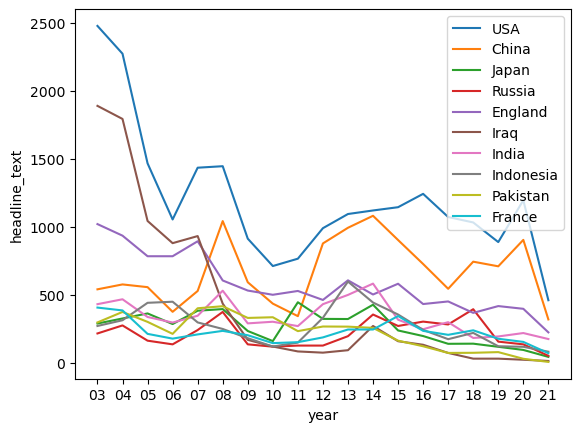

In [155]:
# This was an attempt to graph every country with more than 4000 headlines. It did not come out well. 
fig, ax = plt.subplots()
for key, value in headline_df_dict.items():
    sns.lineplot(value.groupby(['year']).headline_text.count(),label=key, ax=ax)

In [158]:
limited_df_dict =  {'USA':us_headlines,'China':china_headlines,
                    'England':england_headlines,'Iraq':iraq_headlines,
                   'India': india_headlines}

Text(0, 0.5, 'Number of headlines')

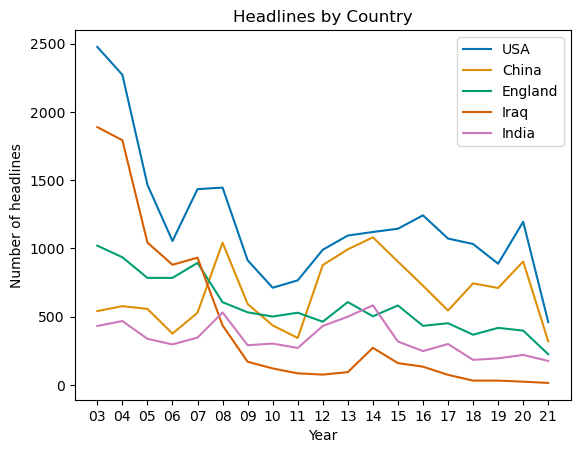

In [177]:
# I restricted the graph to only countries with more than 6000 headlines, and it's a bit better.
fig, ax = plt.subplots()
for key, value in limited_df_dict.items():
    sns.lineplot(value.groupby(['year']).headline_text.count(),label=key, ax=ax)
plt.title('Headlines by Country')
plt.xlabel('Year')
plt.ylabel('Number of headlines')

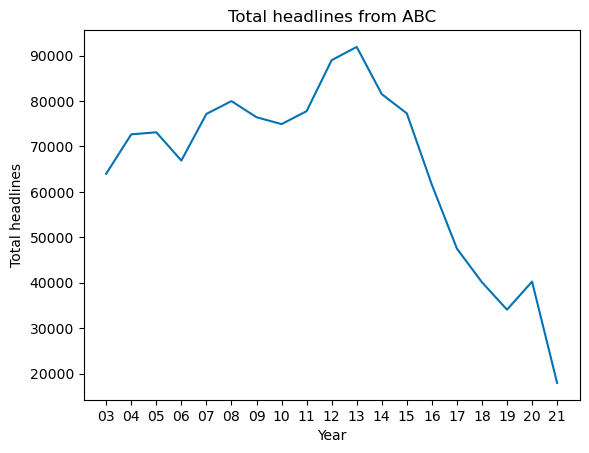

In [190]:
sns.lineplot(headlines.groupby(['year']).headline_text.count())
plt.title('Total headlines from ABC')
plt.xlabel('Year')
plt.ylabel('Total headlines')
plt.show()

In [191]:
headlines_by_year = headlines.groupby(['year']).headline_text.count()

In [199]:
headlines_by_year

year
03    63997
04    72674
05    73124
06    66901
07    77174
08    79991
09    76444
10    74931
11    77778
12    89008
13    91928
14    81531
15    77290
16    61574
17    47511
18    40102
19    34060
20    40240
21    17926
Name: headline_text, dtype: int64

In [197]:
headlines_by_year.columns = ['year','total_headlines']

In [208]:
test = pd.concat([us_headlines.groupby('year').headline_text.count(),headlines_by_year],axis=1)

In [209]:
test.columns = ['country_headlines', 'total_headlines']

In [211]:
test['scaled_headlines'] = test['country_headlines']/test['total_headlines'] * 100

In [212]:
for country in limited_df_dict.keys():
    df = pd.concat([limited_df_dict[country].groupby('year').headline_text.count(),headlines_by_year],axis=1)
    df.columns = ['country_headlines', 'total_headlines']
    df['scaled_headlines'] = df['country_headlines']/df['total_headlines'] * 100
    limited_df_dict[country] = df

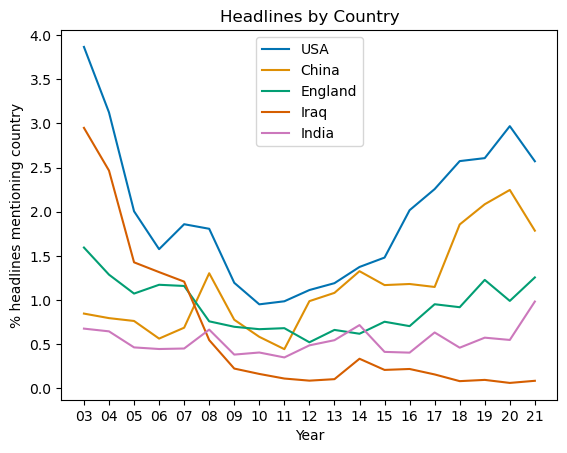

In [252]:
fig, ax = plt.subplots()
for key, value in limited_df_dict.items():
    sns.lineplot(value['scaled_headlines'],label=key, ax=ax)
plt.title('Headlines by Country')
plt.xlabel('Year')
plt.ylabel('% headlines mentioning country')
plt.show()

In [262]:
pandemic_df = pd.concat([pandemic_headlines.groupby('year').headline_text.count(), headlines_by_year], axis=1).sort_index().fillna(0)
pandemic_df.columns = ['pandemic_headlines','total_headlines']
pandemic_df['scaled_headlines'] = pandemic_df['pandemic_headlines']/pandemic_df['total_headlines'] * 100
pandemic_df

,pandemic_headlines,total_headlines,scaled_headlines
year,,,
03,0.0,63997,0.000000
04,1.0,72674,0.001376
05,20.0,73124,0.027351
06,9.0,66901,0.013453
07,6.0,77174,0.007775
08,3.0,79991,0.003750
09,14.0,76444,0.018314
10,1.0,74931,0.001335
11,1.0,77778,0.001286


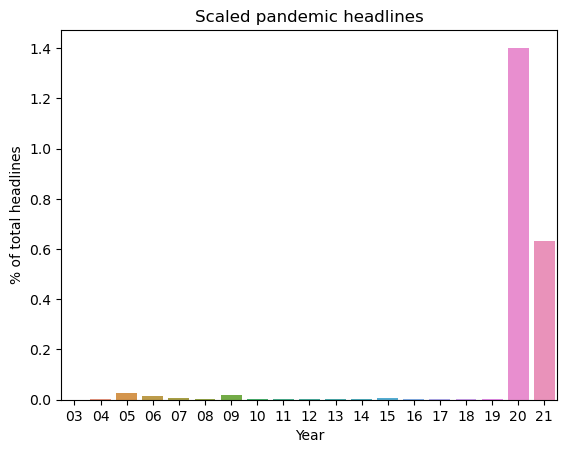

In [276]:
sns.barplot(y=pandemic_df['scaled_headlines'],x=pandemic_df.index)
plt.xlabel('Year')
plt.ylabel('% of total headlines')
plt.title('Scaled pandemic headlines')
plt.show()

In [254]:
war_df = pd.concat([word_search('war').groupby('year').headline_text.count(),headlines_by_year],axis=1)
war_df.columns = ['war_headlines', 'total_headlines']
war_df['scaled_headlines'] = war_df['war_headlines']/war_df['total_headlines'] * 100
war_df

,war_headlines,total_headlines,scaled_headlines
year,,,
03,665,63997,1.039111
04,289,72674,0.397666
05,239,73124,0.326842
06,220,66901,0.328844
07,224,77174,0.290253
08,206,79991,0.257529
09,211,76444,0.276019
10,209,74931,0.278923
11,226,77778,0.290571


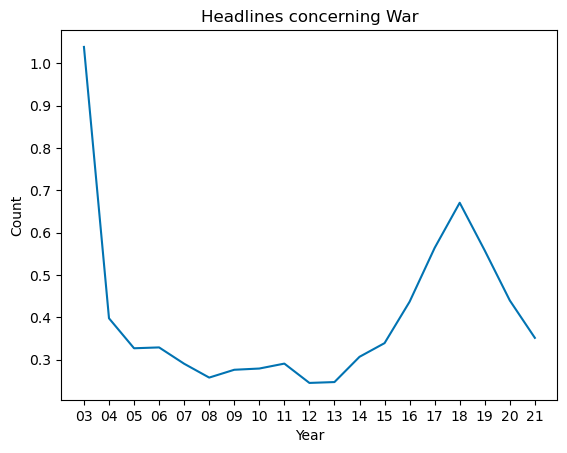

In [255]:
sns.lineplot(war_df['scaled_headlines'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Headlines concerning War')
plt.show()